In [4]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.6 MB/s eta 0:00:00


In [5]:
!pip install keras_facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=5f4f14b399d09c10f09db0cd9a34cc5598a02a7bc57c17ff2f5edb720ff50490
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras_facenet


# Importing necessary libraries

In [6]:
from mtcnn import MTCNN
from keras_facenet import FaceNet
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from skimage import io
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

Images

In [19]:
image1_CR7 ='/content/ronaldo_1.jpg'
image2_CR7 ='/content/ronaldo_2.jpg'

image1_Messi ='/content/messi_1.jpg'
image2_Messi ='/content/messi_2.jpg'

image1_Neymar ='/content/neymar_1.jpg'
image2_Neymar ='/content/neymar_2.jpg'

image1_Mbape ='/content/mbape_1.jpg'
image2_Mbape ='/content/mbape_2.jpg'

image1_Haland ='/content/haland_1.jpg'
image2_Haland ='/content/haland_2.jpg'

image_list = [image1_CR7,image2_CR7,image1_Messi,image2_Messi,image1_Neymar,image2_Neymar,image1_Mbape,image2_Mbape,image1_Haland,image2_Haland]

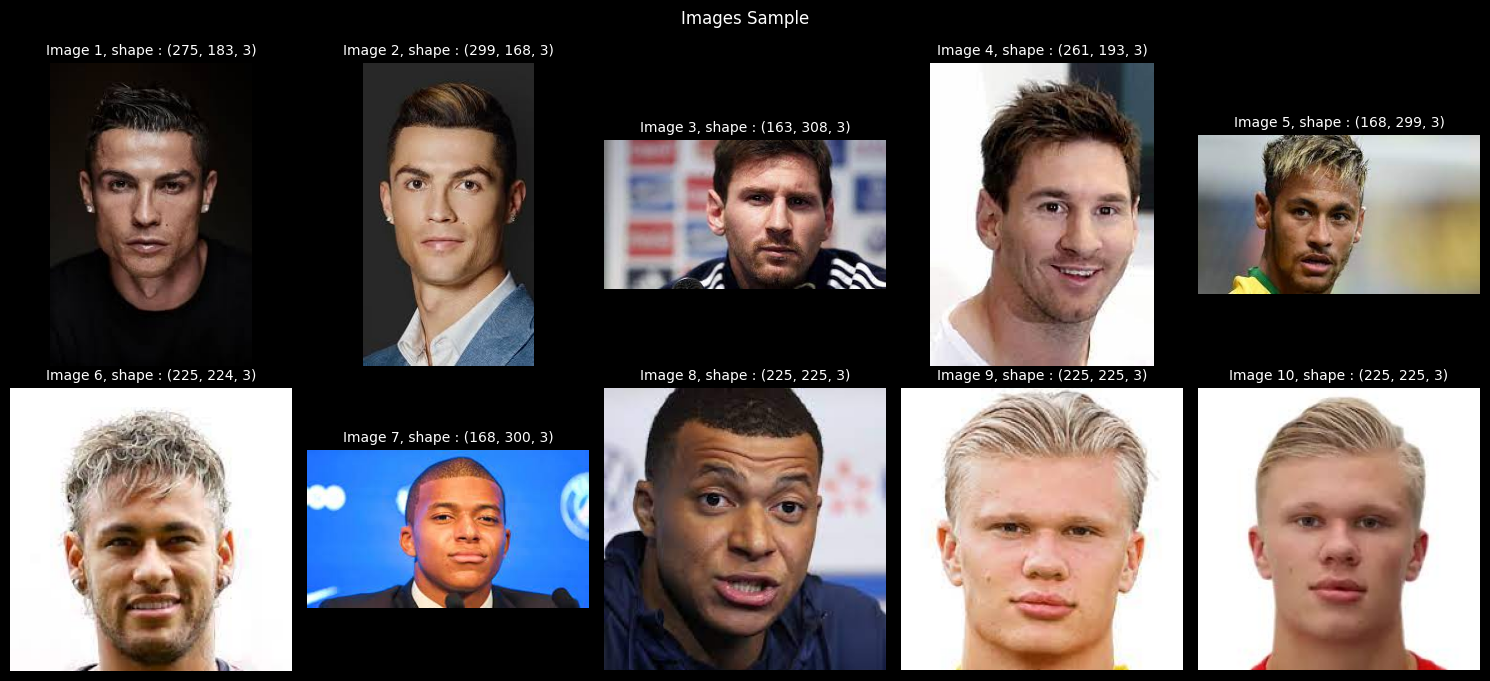

In [22]:
plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.suptitle('Images Sample')
    img = io.imread(image_list[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i + 1}, shape : {img.shape}", size=10)

plt.tight_layout()
plt.show()

In [24]:
class Color:
  GREEN = '\033[92m'
  BLUE = '\033[94m'
  RED = '\033[91m'
  BOLD = '\033[1m'
  END = '\033[0m'

In [35]:
def Face_Detection(image=None, model =MTCNN(), color='red', url=None, size=10):
  print(f'{Color.BOLD} The process has been started for detection faces....')

  plt.style.use('dark_background')

  if url:
    img =  io.imread(url)
  if image:
    img = plt.imread(image)

  model = model
  coordinates = model.detect_faces(img)

  plt.style.use('dark_background')

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.imshow(img)

  plt.title('Face DEtection')
  plt.axis('off')
  ax = plt.gca()

  for coordinate in coordinates:
    print('{}The box coordinates :{} {}\n{}The confidence : {} {}\n{}The key points : {} {}'.format(
    Color.GREEN, Color.END, coordinate['box'],
    Color.RED, Color.END, coordinate['confidence'],
    Color.BLUE, Color.END, coordinate['keypoints']
))


    x,y,width,height =  coordinate['box']

    rect = plt.Rectangle((x,y), width, height, fill=False, color=color)
    ax.add_patch(rect)

  plt.subplot(1, 2, 2)
  plt.imshow(img)
  plt.title(f'key points')
  plt.axis('off')

  for coordinate in coordinates:
    left_eye = coordinate['keypoints']['left_eye']
    right_eye = coordinate['keypoints']['right_eye']
    nose = coordinate['keypoints']['nose']

    mouth_left = coordinate['keypoints']['mouth_left']
    mouth_right = coordinate['keypoints']['mouth_right']

    plt.scatter(left_eye[0], left_eye[1], color='red', s=size)
    plt.scatter(right_eye[0], right_eye[1], color='red', s=size)
    plt.scatter(nose[0], nose[1], color='red', s=size)

    plt.scatter(mouth_left[0], mouth_left[1], color='red', s=size)
    plt.scatter(mouth_right[0], mouth_right[1], color='red', s=size)

  plt.show()
  print('--'*30)

 The process has been started for detection faces....
The box coordinates : [39, 58, 101, 133]
The confidence :  0.9621332287788391
The key points :  {'nose': [np.int64(85), np.int64(142)], 'mouth_right': [np.int64(105), np.int64(163)], 'right_eye': [np.int64(110), np.int64(110)], 'left_eye': [np.int64(63), np.int64(109)], 'mouth_left': [np.int64(67), np.int64(162)]}


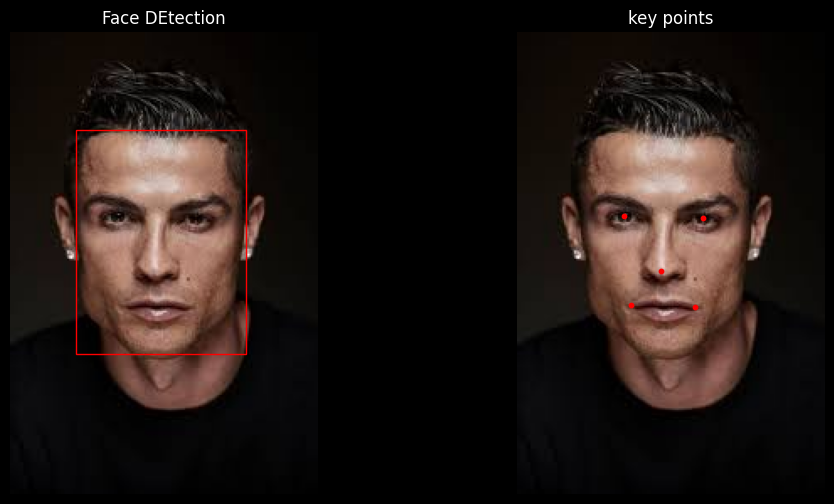

------------------------------------------------------------
 The process has been started for detection faces....
The box coordinates : [28, 64, 106, 146]
The confidence :  0.9040870666503906
The key points :  {'nose': [np.int64(74), np.int64(150)], 'mouth_right': [np.int64(98), np.int64(175)], 'right_eye': [np.int64(104), np.int64(119)], 'left_eye': [np.int64(53), np.int64(118)], 'mouth_left': [np.int64(55), np.int64(175)]}


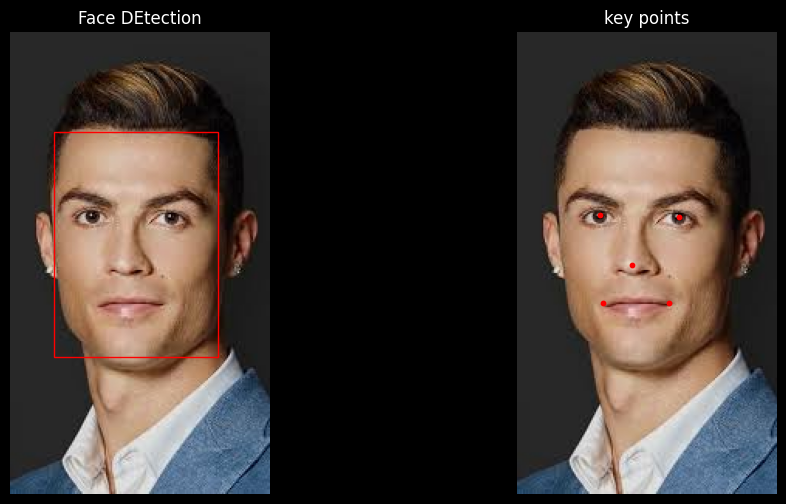

------------------------------------------------------------
 The process has been started for detection faces....
The box coordinates : [133, 17, 107, 140]
The confidence :  0.9995712637901306
The key points :  {'nose': [np.int64(192), np.int64(95)], 'mouth_right': [np.int64(207), np.int64(124)], 'right_eye': [np.int64(215), np.int64(67)], 'left_eye': [np.int64(168), np.int64(65)], 'mouth_left': [np.int64(169), np.int64(120)]}


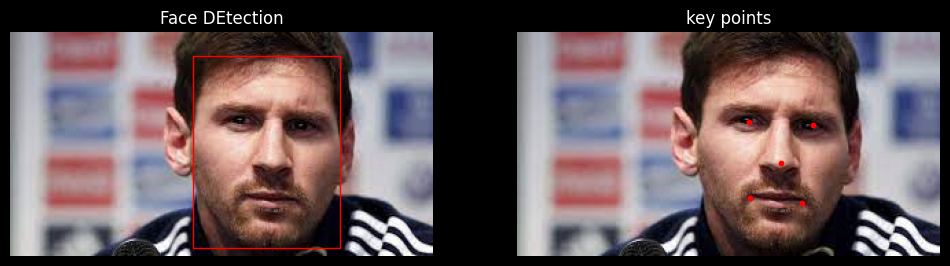

------------------------------------------------------------
 The process has been started for detection faces....
The box coordinates : [74, 71, 98, 142]
The confidence :  0.9905886650085449
The key points :  {'nose': [np.int64(131), np.int64(157)], 'mouth_right': [np.int64(147), np.int64(176)], 'right_eye': [np.int64(152), np.int64(128)], 'left_eye': [np.int64(107), np.int64(125)], 'mouth_left': [np.int64(102), np.int64(174)]}


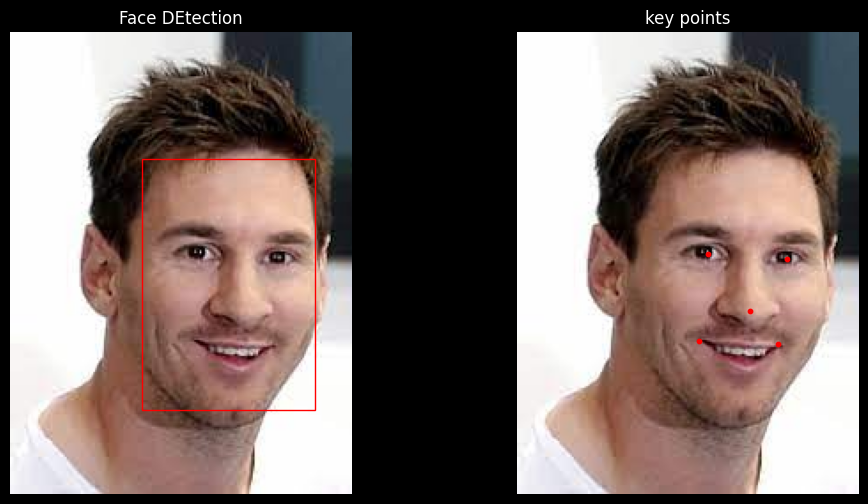

------------------------------------------------------------
 The process has been started for detection faces....
The box coordinates : [78, 33, 91, 131]
The confidence :  0.9978399276733398
The key points :  {'nose': [np.int64(130), np.int64(111)], 'mouth_right': [np.int64(142), np.int64(136)], 'right_eye': [np.int64(150), np.int64(86)], 'left_eye': [np.int64(109), np.int64(80)], 'mouth_left': [np.int64(106), np.int64(132)]}


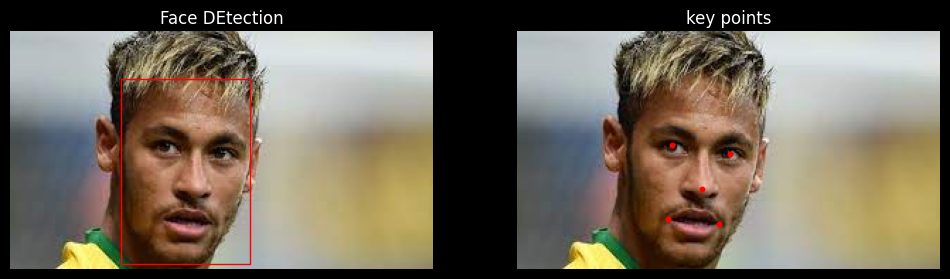

------------------------------------------------------------
 The process has been started for detection faces....
The box coordinates : [60, 66, 106, 139]
The confidence :  0.9996582269668579
The key points :  {'nose': [np.int64(113), np.int64(150)], 'mouth_right': [np.int64(135), np.int64(169)], 'right_eye': [np.int64(135), np.int64(121)], 'left_eye': [np.int64(89), np.int64(123)], 'mouth_left': [np.int64(92), np.int64(172)]}


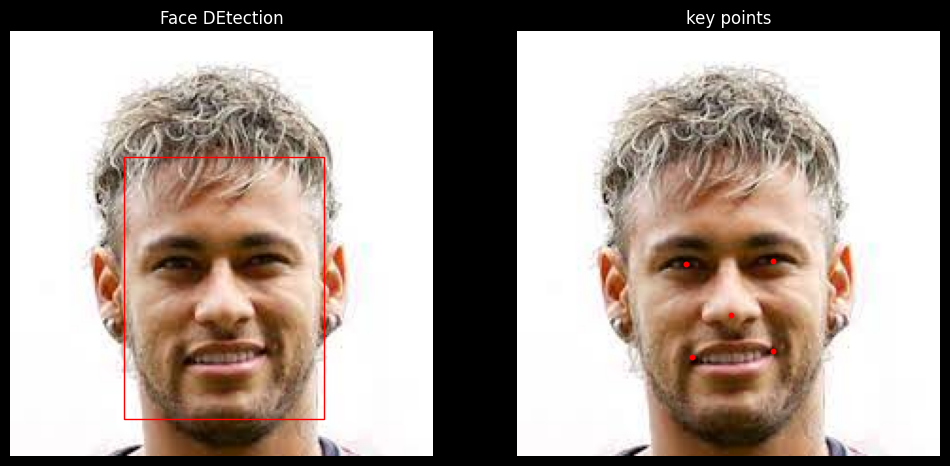

------------------------------------------------------------
 The process has been started for detection faces....
The box coordinates : [117, 24, 93, 123]
The confidence :  0.9997193217277527
The key points :  {'nose': [np.int64(173), np.int64(90)], 'mouth_right': [np.int64(190), np.int64(114)], 'right_eye': [np.int64(189), np.int64(73)], 'left_eye': [np.int64(146), np.int64(71)], 'mouth_left': [np.int64(148), np.int64(113)]}


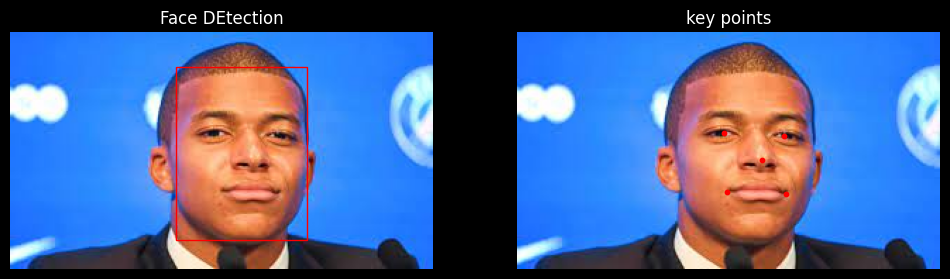

------------------------------------------------------------
 The process has been started for detection faces....
The box coordinates : [47, 23, 128, 176]
The confidence :  0.9991735816001892
The key points :  {'nose': [np.int64(119), np.int64(125)], 'mouth_right': [np.int64(136), np.int64(158)], 'right_eye': [np.int64(146), np.int64(95)], 'left_eye': [np.int64(89), np.int64(89)], 'mouth_left': [np.int64(88), np.int64(153)]}


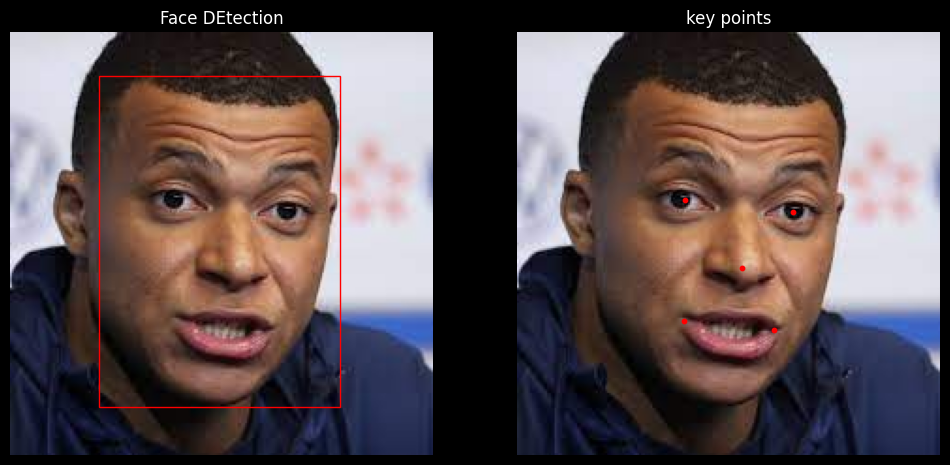

------------------------------------------------------------
 The process has been started for detection faces....
The box coordinates : [51, 51, 123, 157]
The confidence :  0.9959338307380676
The key points :  {'nose': [np.int64(115), np.int64(144)], 'mouth_right': [np.int64(137), np.int64(174)], 'right_eye': [np.int64(143), np.int64(114)], 'left_eye': [np.int64(87), np.int64(111)], 'mouth_left': [np.int64(88), np.int64(171)]}


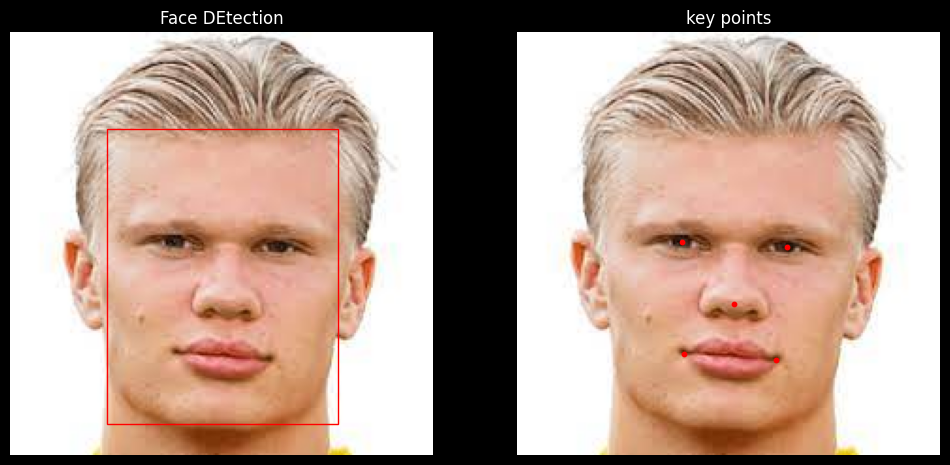

------------------------------------------------------------
 The process has been started for detection faces....
The box coordinates : [57, 52, 108, 142]
The confidence :  0.9972442388534546
The key points :  {'nose': [np.int64(112), np.int64(130)], 'mouth_right': [np.int64(132), np.int64(161)], 'right_eye': [np.int64(137), np.int64(108)], 'left_eye': [np.int64(88), np.int64(106)], 'mouth_left': [np.int64(89), np.int64(159)]}


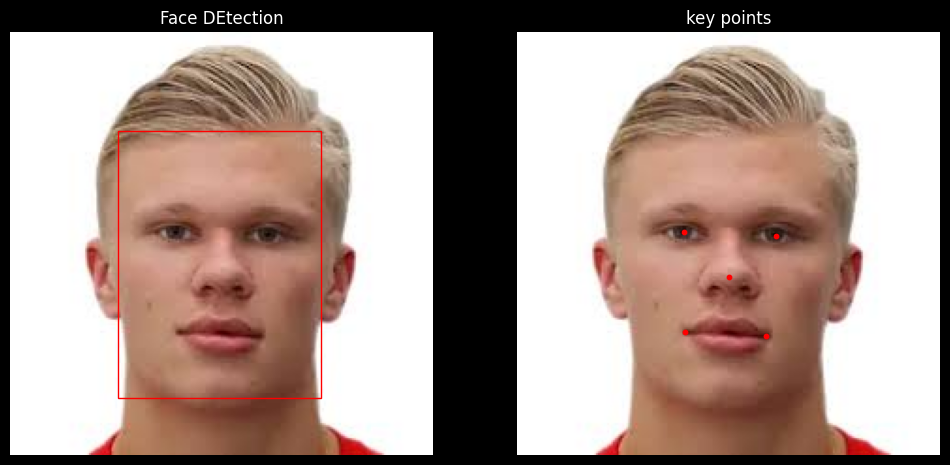

------------------------------------------------------------


In [36]:
for img in image_list:
  Face_Detection(image=img, color='red', size=10)

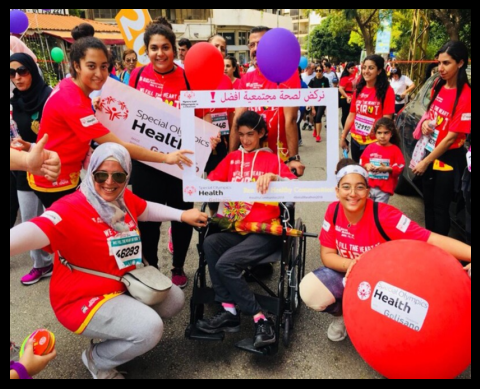

In [37]:
url = 'https://dotorg.brightspotcdn.com/dims4/default/776687d/2147483647/strip/true/crop/700x562+0+0/resize/800x642!/quality/90/?url=http%3A%2F%2Fsoi-brightspot.s3.amazonaws.com%2Fdotorg%2F0c%2Fa8%2Fcef71b9848eb82143904958c46ba%2Flebanon-1.jpg'
image = io.imread(url)
plt.imshow(image)
plt.axis('off')
plt.show()

 The process has been started for detection faces....
The box coordinates : [743, 77, 33, 46]
The confidence :  0.9999942183494568
The key points :  {'nose': [np.int64(745), np.int64(106)], 'mouth_right': [np.int64(758), np.int64(113)], 'right_eye': [np.int64(757), np.int64(93)], 'left_eye': [np.int64(743), np.int64(95)], 'mouth_left': [np.int64(747), np.int64(114)]}
The box coordinates : [0, 89, 38, 50]
The confidence :  0.9999826550483704
The key points :  {'nose': [np.int64(10), np.int64(121)], 'mouth_right': [np.int64(22), np.int64(129)], 'right_eye': [np.int64(21), np.int64(107)], 'left_eye': [np.int64(4), np.int64(110)], 'mouth_left': [np.int64(9), np.int64(131)]}
The box coordinates : [198, 78, 20, 25]
The confidence :  0.9999335408210754
The key points :  {'nose': [np.int64(211), np.int64(93)], 'mouth_right': [np.int64(215), np.int64(98)], 'right_eye': [np.int64(215), np.int64(87)], 'left_eye': [np.int64(205), np.int64(88)], 'mouth_left': [np.int64(208), np.int64(99)]}
The box 

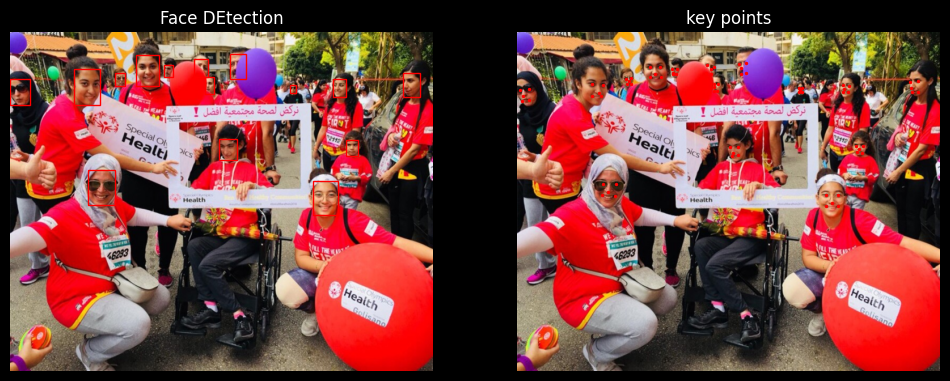

------------------------------------------------------------


In [38]:
Face_Detection(url=url, size=2)

In [39]:
def reading_img(img_path):
  img = cv2.imread(img_path)
  image = cv2.cvtColor(img, code = cv2.COLOR_BGR2RGB)
  return image

In [40]:
def Face_Detection_FaceNet(image, margin=0.2):
  model = MTCNN()
  detection = model.detect_faces(image)

  if detection:
    x, y, width, height = detection[0]['box']
    margin=margin
    x_min, y_min = max(x- int(margin *width), 0), max(y- int(margin *height), 0)
    x_max, y_max = min(x + width + int(margin *width), image.shape[1]), min(y + height + int(margin *height), image.shape[0])

    face_box = image[y_min:y_max, x_min:x_max]
    image_with_face_detection = cv2.resize(face_box, (160, 160))

    return image_with_face_detection
  else:
    return None

In [49]:
def Embedding(fimage_with_face_detection):
  model = FaceNet()
  Embedding_vector = model.embeddings([fimage_with_face_detection])[0]
  return Embedding_vector

In [50]:
def Similarity_Measurement(embedding_vector1, embedding_vector2, threshold=0.7):
   Distance =  cosine(embedding_vector1, embedding_vector2)
   scan_distance =  Distance < threshold
   return scan_distance

In [51]:
def Comparison_Faces(img1, img2):
  image1 = reading_img(img1)
  image2 = reading_img(img2)

  face1 = Face_Detection_FaceNet(image=image1, margin=0.2)
  face2 = Face_Detection_FaceNet(image=image2, margin=0.2)

  if face1 is not None and face2 is not None:
    plt.style.use('dark_background')
    plt.figure(figsize=(12, 6))

    plt.suptitle('Faces Comparison')

    plt.subplot(1, 2, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title('Image 1\nThe shape{face1.shape}')

    plt.subplot(1, 2, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title('Image 2\nThe shape{face2.shape}')

    plt.show()

    embed1 = Embedding(face1)
    embed2 = Embedding(face2)

    return Similarity_Measurement(embed1, embed2)
  else:
    return None


In [52]:
def Showing(image_path1, image_path2):
  print(f'{Color.BOLD}The process has been started for faces comparison....')

  checking = Comparison_Faces(img1=image_path1, img2=image_path2)

  if checking:
    print(f'Result: {Color.GREEN} The person in both image is the{Color.BOLD}same{Color.END}')
  else:
    print(f'Result: {Color.RED} The person in both image is not the{Color.BOLD}same{Color.END}')

  print('--'*40)

The process has been started for faces comparison....


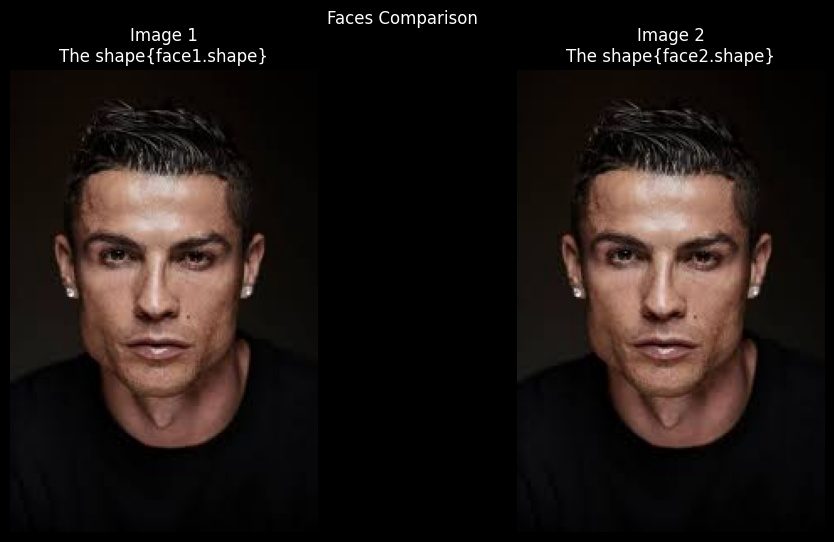

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Result:  The person in both image is thesame
--------------------------------------------------------------------------------
The process has been started for faces comparison....


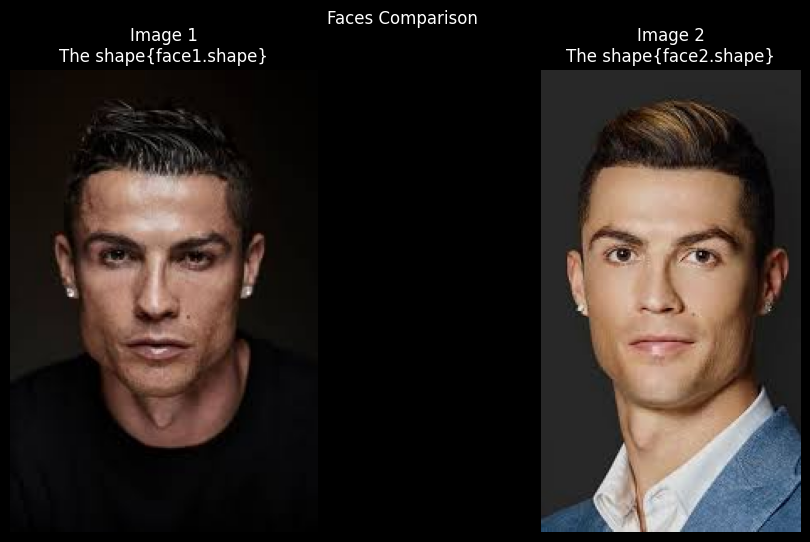

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Result:  The person in both image is thesame
--------------------------------------------------------------------------------
The process has been started for faces comparison....


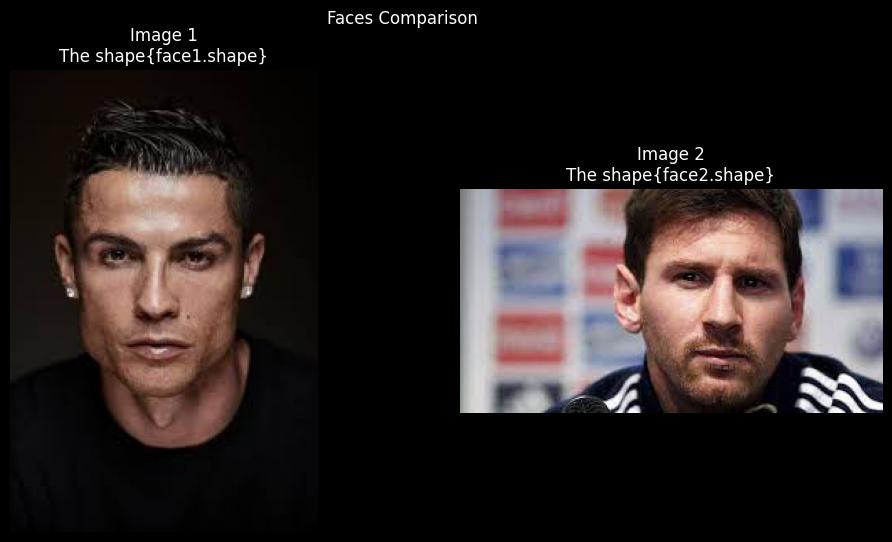

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Result:  The person in both image is not thesame
--------------------------------------------------------------------------------
The process has been started for faces comparison....


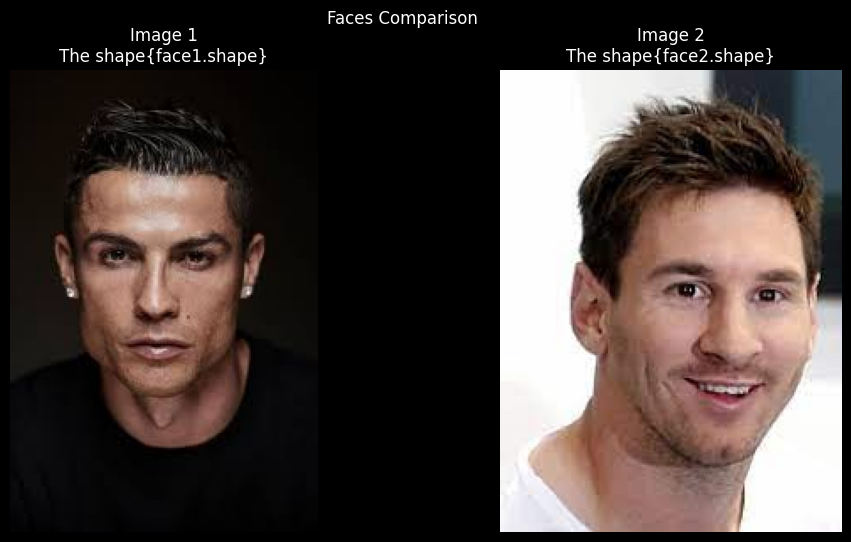

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Result:  The person in both image is not thesame
--------------------------------------------------------------------------------
The process has been started for faces comparison....


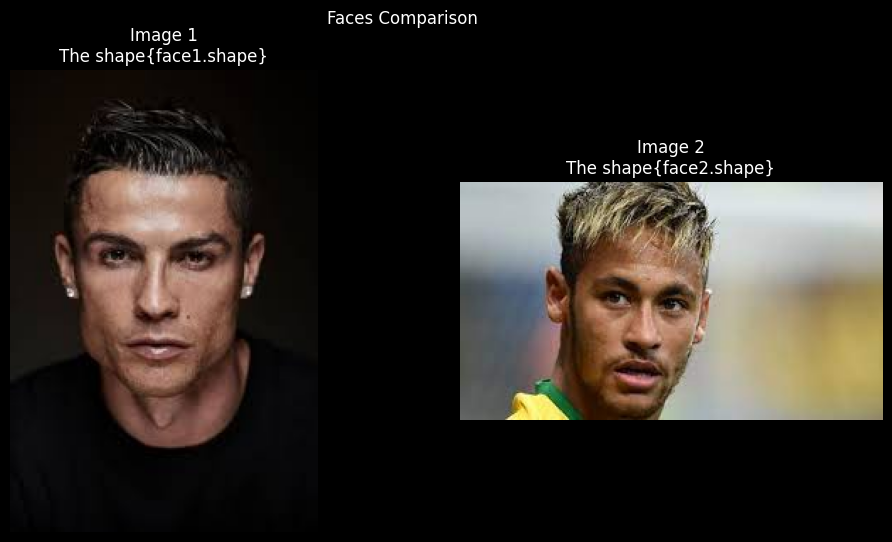

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Result:  The person in both image is not thesame
--------------------------------------------------------------------------------
The process has been started for faces comparison....


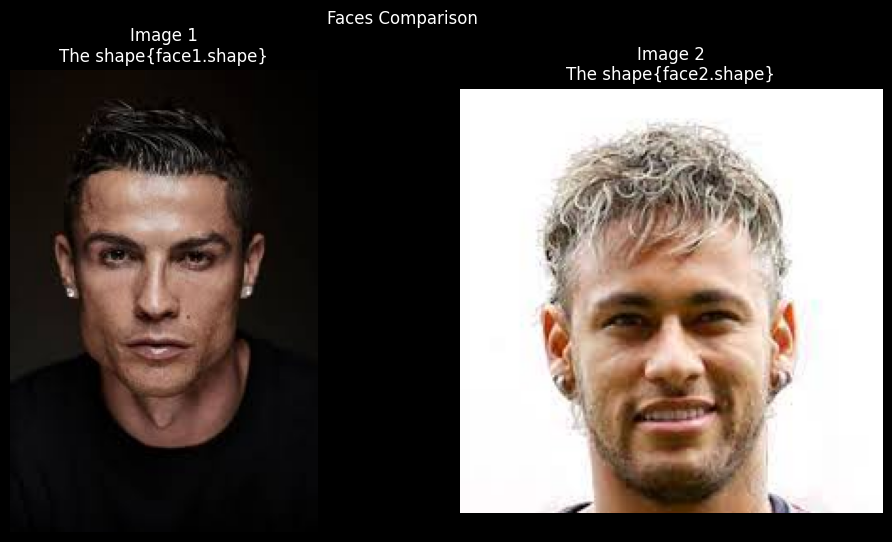

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Result:  The person in both image is not thesame
--------------------------------------------------------------------------------
The process has been started for faces comparison....


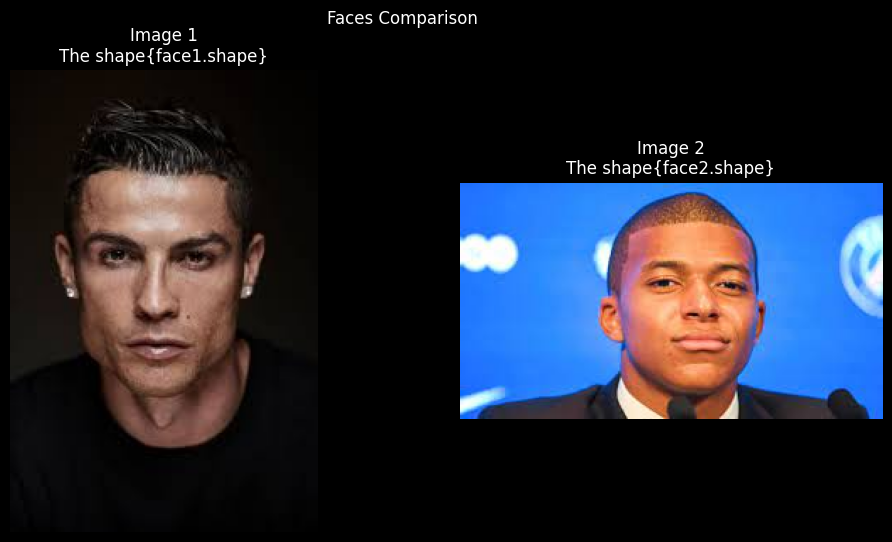

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Result:  The person in both image is not thesame
--------------------------------------------------------------------------------
The process has been started for faces comparison....


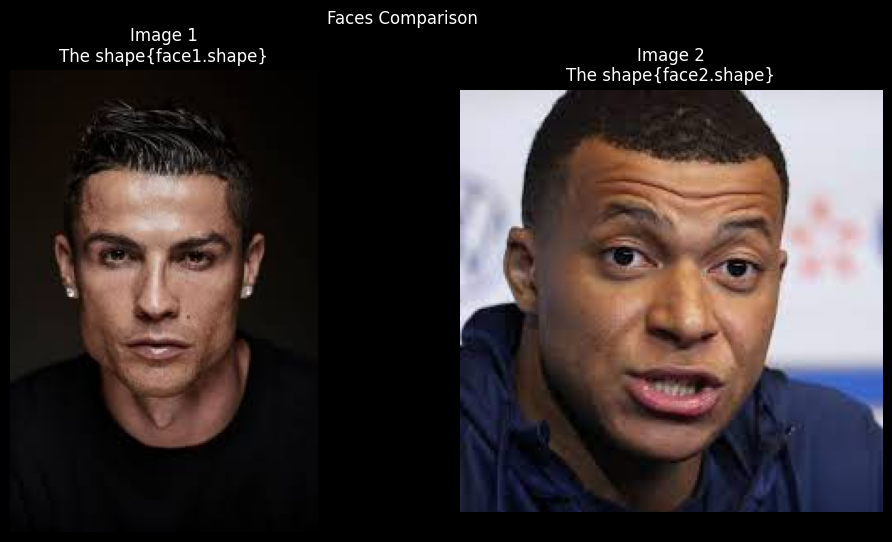

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Result:  The person in both image is not thesame
--------------------------------------------------------------------------------
The process has been started for faces comparison....


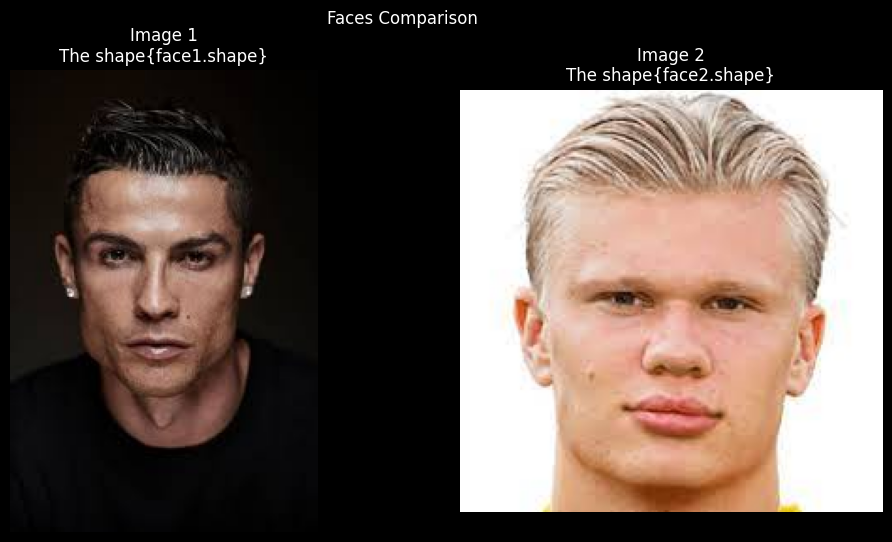

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Result:  The person in both image is not thesame
--------------------------------------------------------------------------------
The process has been started for faces comparison....


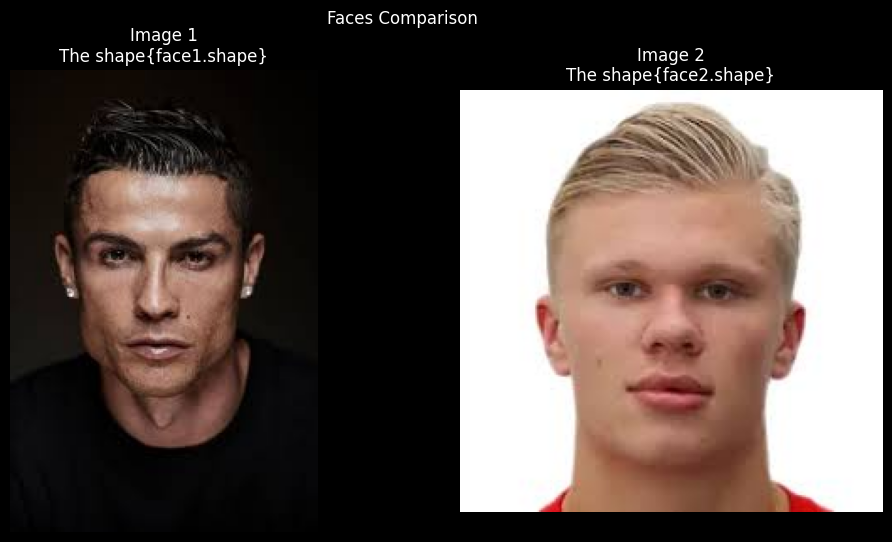

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Result:  The person in both image is not thesame
--------------------------------------------------------------------------------


In [53]:
for img in image_list:
  Showing(image_list[0], img)